<a href="https://colab.research.google.com/github/Udhayabas/1.python-assignments/blob/main/object%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

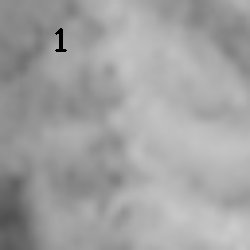

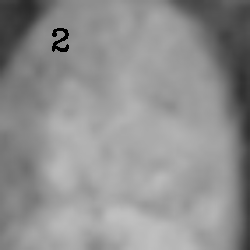

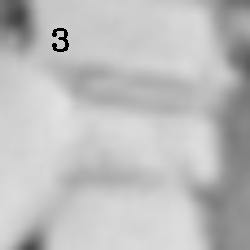

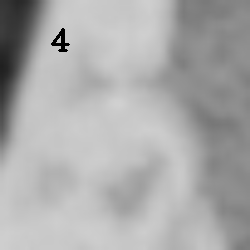

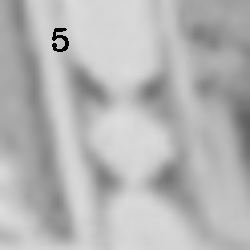

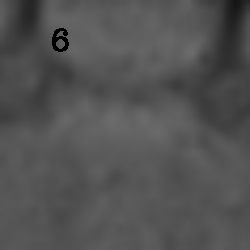

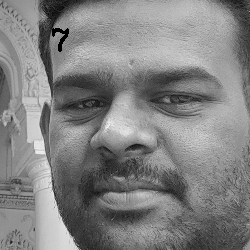

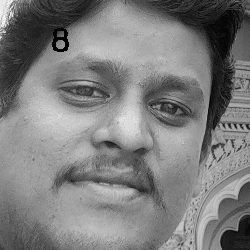

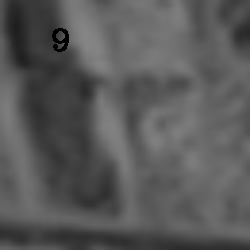

All cropped faces are saved in ./human_faces


In [4]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Load the pre-trained Haar Cascade classifier for face detection
face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_detect.empty():
    raise IOError('Unable to load the haarcascade_frontalface_default.xml file')

def face_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_detections = face_detect.detectMultiScale(gray, 1.3, 5)

    if len(face_detections) == 0:
        return None

    faces = []
    for (x, y, w, h) in face_detections:
        face_cropped = image[y:y+h, x:x+w]
        faces.append(face_cropped)

    return faces

def process_image(image_path, output_folder):
    image = cv2.imread(image_path)
    if image is None:
        print("Error loading image")
        return

    faces = face_detector(image)

    if faces is None:
        print("No faces detected")
        return

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    face_count = 0
    for face in faces:
        face_count += 1
        resized_face = cv2.resize(face, (250, 250))
        gray_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2GRAY)
        path = os.path.join(output_folder, f'face_{face_count}.jpg')
        cv2.imwrite(path, gray_face)
        cv2.putText(gray_face, str(face_count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
        cv2_imshow(gray_face)

    print(f"All cropped faces are saved in {output_folder}")

# Example usage
image_path = 'udhaya raja.jpg'
output_folder = './human_faces'
process_image(image_path, output_folder)
